##CIFAR 10 with ConvNets

In [2]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
#Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
#shapes of traning and testing 
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


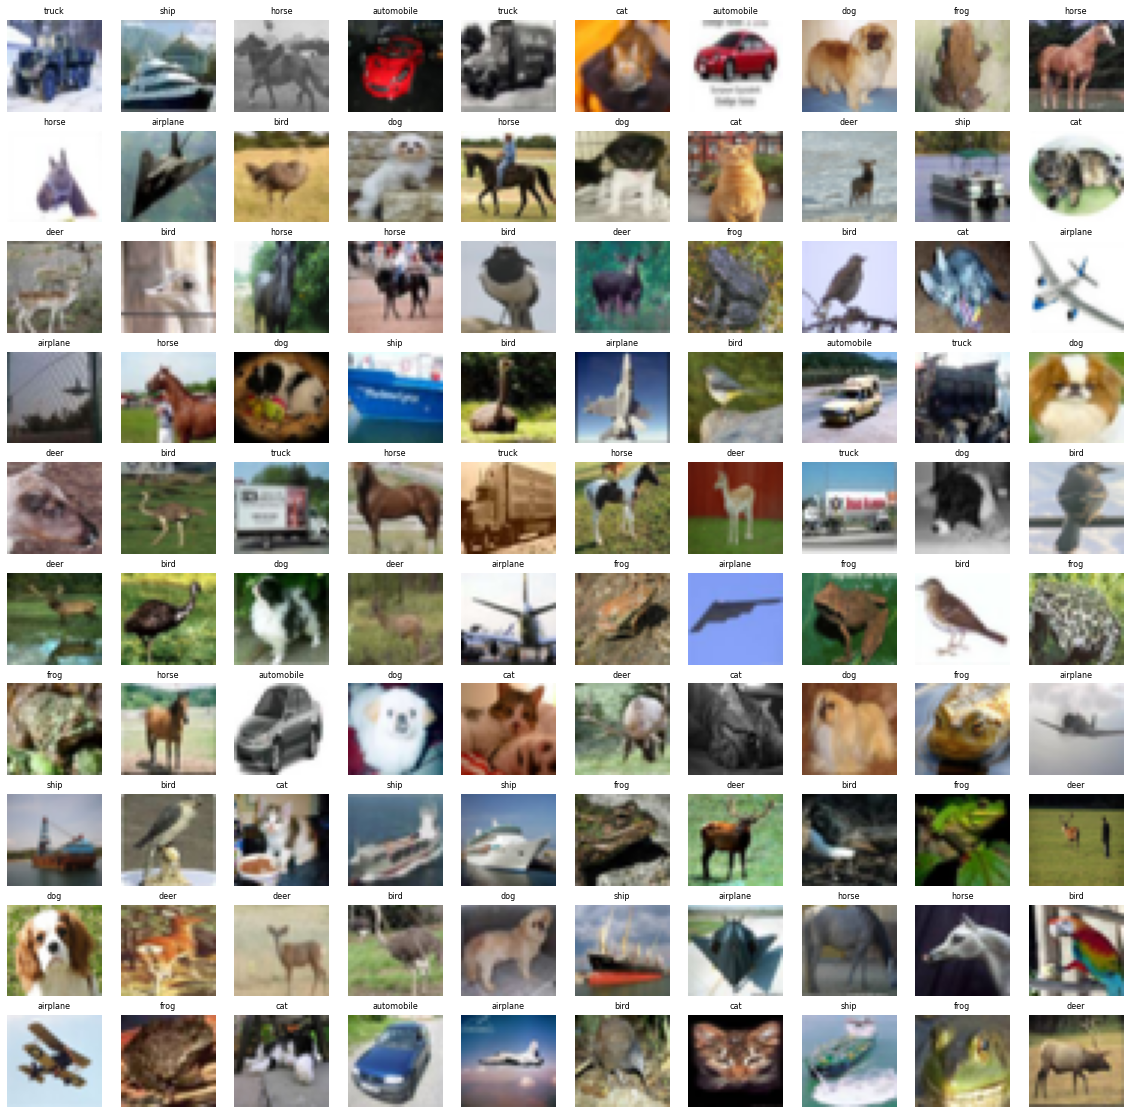

In [5]:
#visualization of data 
# Define the labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10
#axes to plot figures at various locations          
fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))
#flatten
axes = axes.ravel() 
#the length of the train dataset
n_train = len(X_train) 
# Select a random number from n_train
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
#read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')


In [6]:
#Normalize Data
#X_train = X_train.reshape((50000 , 32 * 32 * 3))
X_train = X_train.astype('float32') / 255
#X_test = X_test.reshape((10000 , 32 * 32 *3 ))
X_test = X_test.astype('float32') / 255


train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
history = model.fit(X_train, train_labels, epochs=30, batch_size=20)

Epoch 1/30
2500/2500 [==============================] - 78s 31ms/step - loss: 1.7528 - accuracy: 0.3640
Epoch 2/30
2500/2500 [==============================] - 78s 31ms/step - loss: 1.4429 - accuracy: 0.4821
Epoch 3/30
2500/2500 [==============================] - 79s 32ms/step - loss: 1.3368 - accuracy: 0.5263
Epoch 4/30
2500/2500 [==============================] - 80s 32ms/step - loss: 1.2645 - accuracy: 0.5540
Epoch 5/30
2500/2500 [==============================] - 79s 31ms/step - loss: 1.2053 - accuracy: 0.5770
Epoch 6/30
2500/2500 [==============================] - 78s 31ms/step - loss: 1.1538 - accuracy: 0.5954
Epoch 7/30
2500/2500 [==============================] - 79s 31ms/step - loss: 1.1057 - accuracy: 0.6138
Epoch 8/30
2500/2500 [==============================] - 79s 32ms/step - loss: 1.0616 - accuracy: 0.6288
Epoch 9/30
2500/2500 [==============================] - 78s 31ms/step - loss: 1.0267 - accuracy: 0.6420
Epoch 10/30
2500/2500 [==============================] - 78s 31m

In [11]:
model.evaluate(X_test,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.8375 - accuracy: 0.7183


[0.8375019431114197, 0.7182999849319458]